# Kaggle Project

****Brain Tumor Classification****

**Describe Dataset**

**URL:** https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset/

**Description**

This dataset consists of the scanned images of brain of patient diagnosed of brain tumor. In this dataset the separated files for train and test data with separating features and labels. The Dataset contains 2513 brain tumor images and 2087 healthy images.

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brian-tumor-dataset/metadata_rgb_only.csv
/kaggle/input/brian-tumor-dataset/metadata.csv
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (489).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (72).tif
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2411).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1065).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1014).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (385).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1822).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2023).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Se

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [24]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)

In [25]:
train = gen.flow_from_directory("/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 3681 images belonging to 2 classes.


In [26]:
val = gen.flow_from_directory("/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/",
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices

Found 919 images belonging to 2 classes.


# Classes

In [27]:
classes

{'Brain Tumor': 0, 'Healthy': 1}

In [28]:
import seaborn as sns

# Class Distribution of Brain Tumor Dataset

<AxesSubplot:>

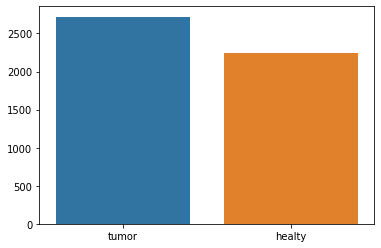

In [29]:
t=0
h=0
for i in range(20):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['tumor','healty'],y=[t,h])
    

# Image Show

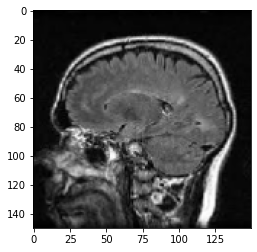

In [30]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

# CNN Architecture

In [31]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

In [32]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])


# Model Summary

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               11214976  
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

# Layers of Model 

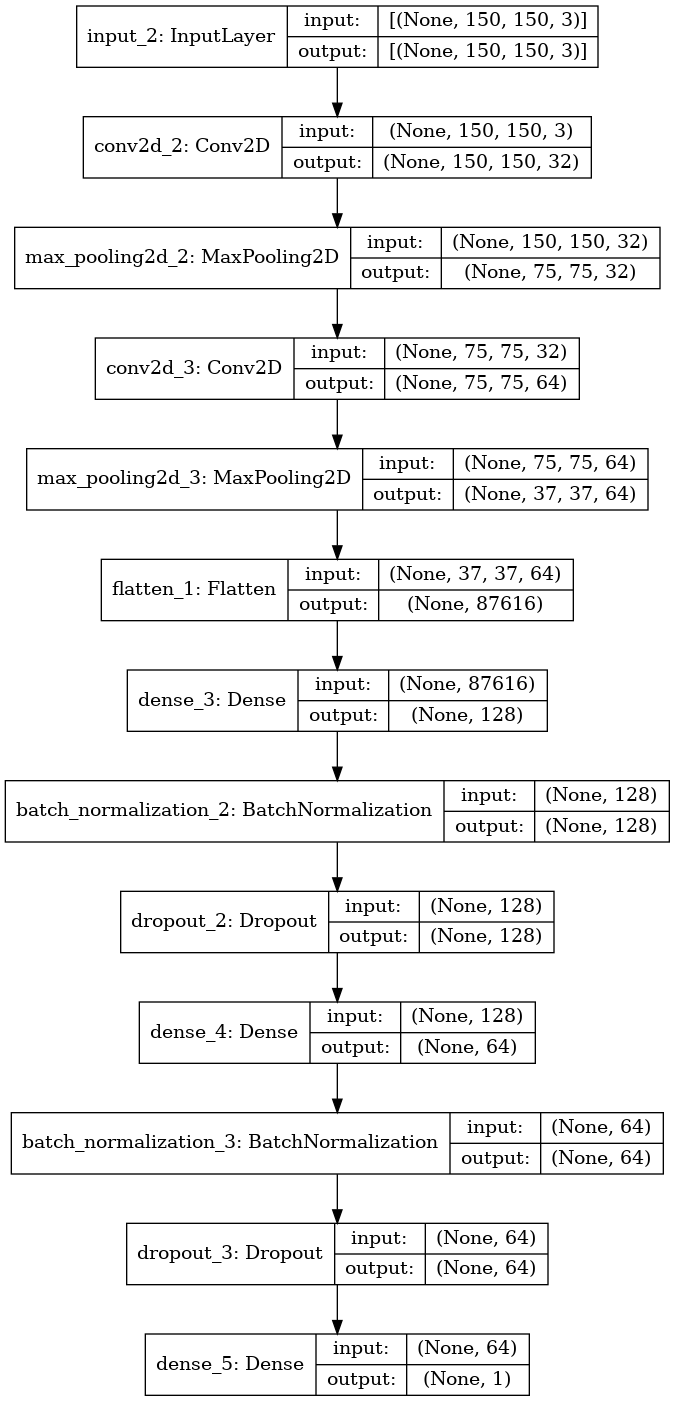

In [34]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [35]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

# Model Training

In [36]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(val))

Epoch 1/20
15/15 [==============================] - 100s 6s/step - loss: 0.6935 - accuracy: 0.6548 - val_loss: 0.8598 - val_accuracy: 0.7018
Epoch 2/20
15/15 [==============================] - 99s 6s/step - loss: 0.3988 - accuracy: 0.8166 - val_loss: 0.5441 - val_accuracy: 0.6899
Epoch 3/20
15/15 [==============================] - 99s 6s/step - loss: 0.2219 - accuracy: 0.9148 - val_loss: 0.3421 - val_accuracy: 0.9021
Epoch 4/20
15/15 [==============================] - 99s 6s/step - loss: 0.1161 - accuracy: 0.9649 - val_loss: 0.2631 - val_accuracy: 0.9587
Epoch 5/20
15/15 [==============================] - 98s 6s/step - loss: 0.0751 - accuracy: 0.9797 - val_loss: 0.2272 - val_accuracy: 0.9859
Epoch 6/20
15/15 [==============================] - 99s 6s/step - loss: 0.0419 - accuracy: 0.9920 - val_loss: 0.1809 - val_accuracy: 0.9913
Epoch 7/20
15/15 [==============================] - 99s 6s/step - loss: 0.0257 - accuracy: 0.9963 - val_loss: 0.1709 - val_accuracy: 0.9793
Epoch 8/20
15/15 [=

# Results (Plot Accuracy)

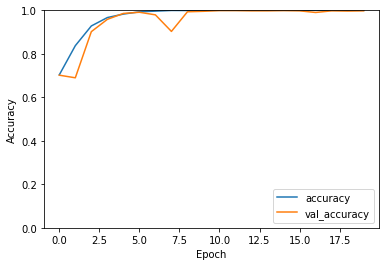

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Plot Loss

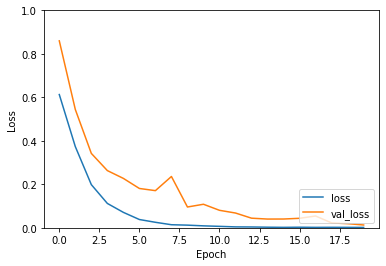

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')